In [1578]:
import os
import json
import requests
from src.najdi_rok import najdi_rok
import pandas as pd

In [1579]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

## Příprava dat

In [1581]:
odkud = 'data_raw/nobelistvo'

In [1582]:
df = pd.DataFrame()
for f in os.listdir(odkud):
    pracovni = pd.read_parquet(os.path.join(odkud, f))
    kod = f.split('_')[2].split('.')[0]
    pracovni = pracovni[pracovni['100_7'].astype(str).str.contains(kod, na=False)]
    if len(pracovni) == 0:
        print(f"{f}: nulová délka")
    df = pd.concat([df, pracovni])

nobelovka_1977_jn19990000099.parquet: nulová délka


C:\Users\micha\AppData\Local\Temp\ipykernel_12656\3977322801.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pracovni])
C:\Users\micha\AppData\Local\Temp\ipykernel_12656\3977322801.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pracovni])


In [1583]:
df.loc[df['008'] == '150413q20142015xr     g      000 p cze', 'rok']=2014

In [1584]:
koho = pd.read_json(os.path.join('data_raw','wikidata_nobelovky_pro_filtr.json'))

In [1585]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [1586]:
df = df.explode(['100_a','100_7'])

In [1587]:
df['100_a'] = df['100_a'].apply(lambda x: x[:-1] if x != None else None)

In [1588]:
df[~df['100_a'].str.contains(',',na=False)]

,008,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,700_ind1,700_a,700_4,700_d,700_7,700_t,700_q,700_l,700_ind2,700_c,700_b,700_i,700_n,700_k,700_m,700_r,700_p,700_o,700_s,700_e,700_6,700_x,700_f,700_g,rok,nobelovka,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk194002023,990514s1940 xr cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Salka Valka :],[Islandské děvče : Román /],[Napsal Halldór Kiljan Laxness ; Přeložila M. ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1940.0,1955,Salka Valka
bk194902261,981025s1949 xr ||| 1 cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Svobodný lid /],None,[Halldór Laxness ; [Z dán.] přel. a doslov nap...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1949.0,1955,Svobodný lid
bk194903682,981117s1949 xr 1 cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Úsvit nad slatinami /],None,[Halldór Laxness ; [Z dán. orig.] přel. a dosl...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1949.0,1955,Úsvit nad slatinami
bk195504372,981116s1955 xr cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Islandský zvon /],None,[Halldór Laxness ; Z islandských orig. Íslands...,None,None,None,None,None,None,[1],"[Rak, Jan,]",[aui],[1920-],[jk01101981],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1955.0,1955,Islandský zvon
bk195603733,981127s1956 xr e 000 d cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Prodaná ukolébavka :],[Hra o 4 dějstvích a 6 obrazech /],[Naps. Halldor Laxness ; [Z islandského orig. ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1956.0,1955,Prodaná ukolébavka
bk195701964,981014s1957 xr ||| 1 cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Atomová stanice /],None,[[Autor:] Halldór Kiljan Laxness ; z dán. přek...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1957.0,1955,Atomová stanice
bk195905082,980902s1959 xr 000 cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Světlo světa /],None,[Halldór Kiljan Laxness ; [přeložil Jan Rak]],None,None,None,None,None,None,[1],"[Rak, Jan,]",[trl],[1920-],[jk01101981],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1959.0,1955,Světlo světa
bk196203875,980710s1962 xr ||| | cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Gerpla :],[Hrdinská sága /],[Halldór Kiljan Laxness ; Ze švédského orig. G...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1962.0,1955,Gerpla
bk196403828,971209s1964 xr ||| | cze,[0],Halldór Laxness,jn19981001730,[aut],[1902-1998],None,None,None,None,[1],[0],[Salka Valka /],None,[Halldór Kiljan Laxness ; Ze [stejnojm.] švéds...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1964.0,1955,Salka Valka


In [1589]:
df['100_a'] = df['100_a'].apply(lambda x: f"{x.split(',')[1]} {x.split(',')[0]}" if ',' in x else x)

In [1590]:
df.sample(10)

,008,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,700_ind1,700_a,700_4,700_d,700_7,700_t,700_q,700_l,700_ind2,700_c,700_b,700_i,700_n,700_k,700_m,700_r,700_p,700_o,700_s,700_e,700_6,700_x,700_f,700_g,rok,nobelovka,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ck8403768,841127s1984 xr e 000 j cze,[1],Hermann Hesse,jn19990003467,[aut],[1877-1962],None,None,None,None,[1],[0],[Siddhārtha :],[indická báseň /],[Hermann Hesse ; z německého originálu Siddhar...,None,None,None,None,None,None,[1],"[Černý, Miloš]",[trl],None,[jk01021606],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1984.0,1946,Siddhārtha
nos190120858,000131s1913 xr cze,[1],Rudyard Kipling,jn19990004353,[aut],[1865-1936],None,None,None,None,[1],[0],[Fantasie :],[smyšlenky rozličné /],[Rudyard Kipling ; z angličtiny přel. Julie No...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1913.0,1907,Fantasie
nos190125026,000403s1913 xr a b 000 j cze,[1],Selma Lagerlöf,jn19990004817,[aut],[1858-1940],None,None,None,None,[1],[0],[Podivuhodná cesta Nilse Holgerssona Švédskem /],None,[Selma Lagerlöfová ; ze švédštiny přeložil Emi...,None,None,None,None,None,None,[1],"[Walter, Emil,]",[trl],[1890-1964],[jk01151393],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1913.0,1909,Podivuhodná cesta Nilse Holgerssona Švédskem
nkc20051582355,050916s2005 xr g 000 f cze,[1],Toni Morrison,jo20010082967,[aut],[1931-2019],None,None,None,None,[1],[0],[Láska /],None,[Toni Morrisonová ; [přeložila Zuzana Mayerová...,None,None,None,None,None,None,"[1, 1]","[Mayerová, Zuzana,, Ulmanová, Hana,]","[trl, aui]","[1953-, 1967-]","[jk01080970, xx0006532]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2005.0,1993,Láska
ck9005314,900820s1990 xr e 000 1 cze,[1],Isaac Bashevis Singer,jn19990007991,[aut],[1904-1991],None,None,None,None,[1],[0],[Stará láska a jiné povídky /],None,"[Isaac Bashevis Singer ; [vybral, přeložil, do...",None,None,None,None,None,None,[1],"[Přidal, Antonín,]",[aft],[1935-2017],[jk01101555],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1990.0,1978,Stará láska a jiné povídky
bkn20011004035,010613s1929 xr ||| 1 cze,[1],Johannes Vilhelm Jensen,xx0004106,[aut],[1873-1950],None,None,None,None,[1],[0],[[Dlouhá cesta.],None,[Johannes Vilhelm Jensen ; [přeložil Emil Walt...,"[Díl II],]",[Ledovec : mythy o ledové době a prvním člověk...,None,None,None,None,"[1, 1]","[Walter, Emil,, Konůpek, Jan,]","[trl, ill]","[1890-1964, 1883-1950]","[jk01151393, jk01061578]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1929.0,1944,[Dlouhá cesta.
bk192603229,000811s1926 xr cze,[1],Henryk Sienkiewicz,jn19990007946,[aut],[1846-1916],None,None,None,None,[1],[0],[Quo vadis :],[Román z doby Neronovy /],[H. Sienkiewicz ; Přeložil J. J. Langner ; Ill...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1926.0,1905,Quo vadis
bknvla06809,041202s1947 xr e p cze,[1],Jaroslav Seifert,jk01110657,[aut],[1901-1986],None,None,None,None,[1],[0],[S obláčky hroznů :],[Verše o víně /],[[Autor:] Jaroslav Seifert ; Vyzdobil Jaroslav...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1947.0,1984,S obláčky hroznů
bk193803720,990503s1938 xr cze,[1],Bernard Shaw,jn19990007481,[aut],[1856-1950],None,None,None,None,[1],[0],[Nebeský football a jiné povídky /],None,[Bernard Shaw ; [ze sebraných spisů Shawových ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Non

In [1591]:
df['rozdil'] = df['rok'] - df['nobelovka']

## Kontrola dat

In [1593]:
[r for r in range(1901,2025) if r not in koho['nobelovka'].to_list()]

[1914, 1918, 1935, 1940, 1941, 1942, 1943]

In [1594]:
len(koho)

121

In [1595]:
df['100_a'].nunique()

119

In [1596]:
df.groupby('100_7')['100_a'].nunique().nlargest()

100_7
jk01110657       1
jn19981001227    1
jn19981001318    1
jn19981001567    1
jn19981001730    1
Name: 100_a, dtype: int64

## První vydané knihy nobeliststva

In [1598]:
df.sort_values(by='rok').head(5)

,008,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,700_ind1,700_a,700_4,700_d,700_7,700_t,700_q,700_l,700_ind2,700_c,700_b,700_i,700_n,700_k,700_m,700_r,700_p,700_o,700_s,700_e,700_6,700_x,700_f,700_g,rok,nobelovka,titul,rozdil
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknjfs00162,010618s1873 xr e 000 j cze,[1],Bjørnstjerne Bjørnson,jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Björnstjerne Björnsona Selské novely /],None,[po česku podává Hynek Mejsnar],None,None,None,None,None,None,[1],"[Mejsnar, Hynek Jaroslav,]",[trl],[1837-1895],[jk01081083],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1873.0,1903,Björnstjerne Björnsona Selské novely,-30.0
bknjfs00161,020408s1874 xr e 000 d cze,[1],Bjørnstjerne Bjørnson,jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Novomanželé :],[rodinný obraz ve dvou jednáních /],[od Björnstjern Björnsona ; dle Kurzova vzdělá...,None,None,None,None,None,None,[1],"[Pešková, Eliška,]",[trl],[1833-1895],[jk01092674],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1874.0,1903,Novomanželé,-29.0
bknjfs00166,010618s1875 xr e 000 j cze,[1],Bjørnstjerne Bjørnson,jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Selské novely /],None,[sepsal Björnson Björnstjerne ; přeložil Hynek...,None,None,None,None,None,None,[1],"[Mejsnar, Hynek Jaroslav,]",[trl],[1837-1895],[jk01081083],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1875.0,1903,Selské novely,-28.0
bknjfs00159,010618s1877 xr e 000 d cze,[1],Bjørnstjerne Bjørnson,jn19990000824,[aut],[1832-1910],None,None,None,None,[1],[0],[Bankrot :],[činohra ve čtyrech jednáních /],[napsal Bjoernstjerne Bjoernson ; přeložil J. ...,None,None,None,None,None,None,[1],"[Bittner, Jiří,]",[trl],[1846-1903],[jk01012169],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1877.0,1903,Bankrot,-26.0
bknaus04628,011123s1881 xr 000 0 cze,[1],Henryk Sienkiewicz,jn19990007946,[aut],[1846-1916],None,None,None,None,[1],[0],[Čí vinou? :],[dramatický obraz v jednom jednání /],[od Henryka Sienkieviče ; z polského přeložil ...,None,None,None,None,None,None,[1],"[Frič, Coelestin,]",[trl],[1856-1886],[jk01031864],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1881.0,1905,Čí vinou?,-24.0


## Nejvydávanější

In [1600]:
df.groupby('100_a')['titul'].nunique().nlargest(150)

100_a
 Jaroslav Seifert                        153
 Rudyard Kipling                          81
 Anatole France                           66
 Henryk Sienkiewicz                       66
 Bernard Shaw                             65
 Romain Rolland                           59
 John Galsworthy                          49
 Thomas Mann                              41
 Hermann Hesse                            40
 Rabíndranáth Thákur                      39
 Luigi Pirandello                         38
 Isaac Bashevis Singer                    37
 Knut Hamsun                              34
 Selma Lagerlöf                           33
 Bjørnstjerne Bjørnson                    33
 Maurice Maeterlinck                      32
 André Gide                               27
 Władysław Stanisław Reymont              25
 Sinclair Lewis                           25
 John Steinbeck                           25
 Ivan Aleksejevič Bunin                   25
 Ernest Hemingway                         24
 Wil

In [1601]:
df.groupby('100_7')['titul'].nunique().reindex(koho['100_7'].to_list()).nlargest(150)

100_7
jk01110657           153.0
jn19990004353         81.0
jn19981001227         66.0
jn19990007946         66.0
jn19990007481         65.0
jn19990007118         59.0
jn19990002542         49.0
jn19990005365         41.0
jn19990003467         40.0
jn19981002206         39.0
jn20000604446         38.0
jn19990007991         37.0
jn20000602790         34.0
jn19990004817         33.0
jn19990000824         33.0
jn19990005277         32.0
jn19990002664         27.0
jn19990008205         25.0
jn19990006988         25.0
jn19990210139         25.0
jn19990005053         25.0
jn19990003371         24.0
jn19990002183         24.0
jn19981001318         23.0
jn20000604273         22.0
jn19990001184         22.0
jn19990008691         21.0
jn19990005491         19.0
jn19990006057         19.0
jn19990003245         19.0
jn19990001315         18.0
jn19990002840         18.0
jn19990000996         18.0
jn19990009341         17.0
jn19990007359         16.0
jn20010601143         16.0
jn19990008739         

## Kolik toho vyšlo

In [1692]:
df[['100_7','titul']].shape

(3145, 2)

In [1603]:
df[['100_7','titul']].drop_duplicates().shape

(1798, 2)

In [1604]:
df[~df['100_a'].str.contains('Seifert',na=False)][['100_7','titul']].drop_duplicates().shape

(1645, 2)

## Kdy se vydávají

In [1606]:
vysli_pred = df[df['rozdil'] <= 0].sort_values(by='nobelovka',ascending=False)['100_a'].drop_duplicates().to_list()

In [1607]:
df[~df['100_a'].isin(vysli_pred)].groupby('100_a')[['rozdil','nobelovka']].min().sort_values(by='nobelovka',ascending=False)

,rozdil,nobelovka
100_a,,
Abdulrazak Gurnah,2.0,2021
Yan Mo,1.0,2012
Tomas Tranströmer,NaN,2011
Herta Müller,1.0,2009
Xingjian Gao,10.0,2000
José Saramago,4.0,1998
Derek Walcott,18.0,1992
Iosif Aleksandrovič Brodskij,10.0,1987
Wole Soyinka,3.0,1986


In [1608]:
df[df['rozdil'] > 0].groupby('100_a')['rozdil'].min().reindex(vysli_pred)

100_a
 Kang Han                                 NaN
 Jon Fosse                                NaN
 Annie Ernaux                             1.0
 Louise Glück                             2.0
 Peter Handke                             1.0
 Olga Tokarczuk                           2.0
 Kazuo Ishiguro                           1.0
 Bob Dylan                                2.0
 Svjatlana Aljaksandraŭna Aleksìjevìč     1.0
 Patrick Modiano                          3.0
 Alice Munro                              1.0
 Mario Vargas Llosa                       1.0
 Jean-Marie Gustave Le Clézio             NaN
 Doris May Lessing                        1.0
 Orhan Pamuk                              1.0
 Harold Pinter                            NaN
 Elfriede Jelinek                         2.0
 J. M Coetzee                             3.0
 Imre Kertész                             1.0
 V. S Naipaul                             2.0
 Günter Grass                             2.0
 Dario Fo                   

<Axes: xlabel='nobelovka'>

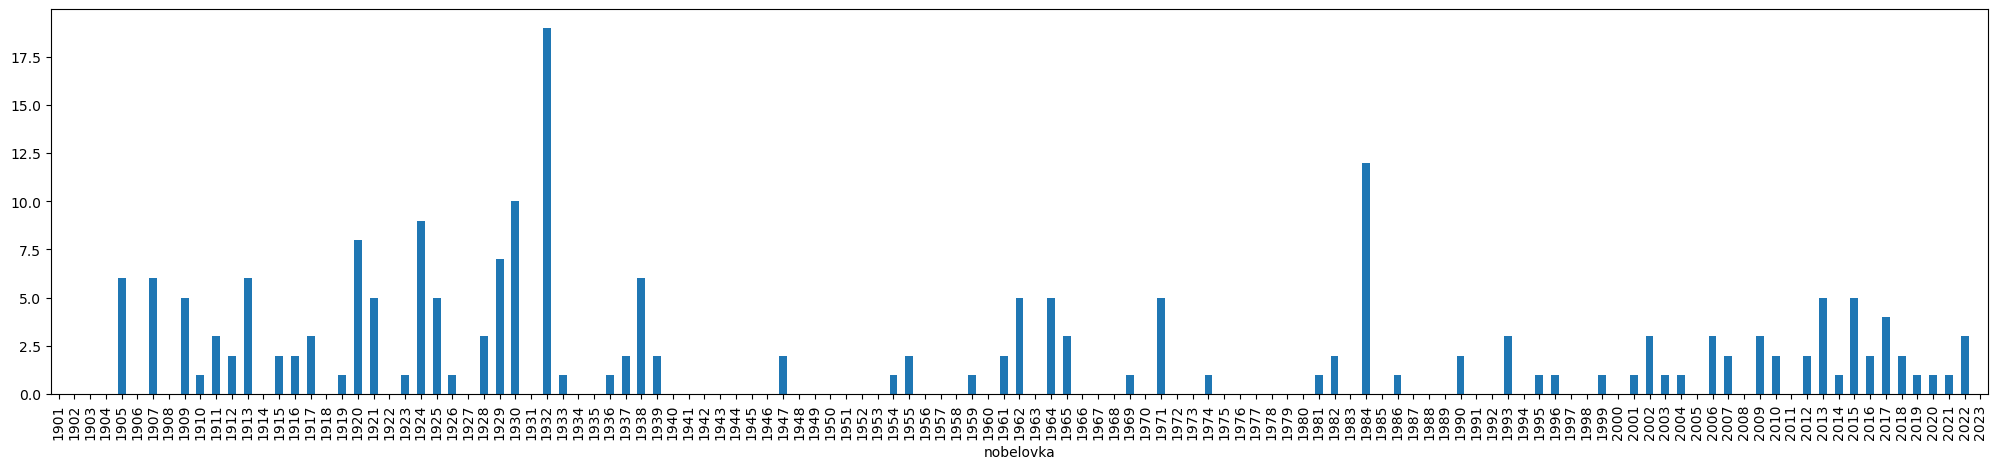

In [1609]:
df[df['rozdil'].isin([1,2,3])].groupby('nobelovka')['titul'].nunique().reindex([r for r in range(1901,2024)]).plot.bar(figsize=(25,5))

In [1610]:
df.groupby('100_a')['rozdil'].min().median()

-11.0

<Axes: ylabel='Frequency'>

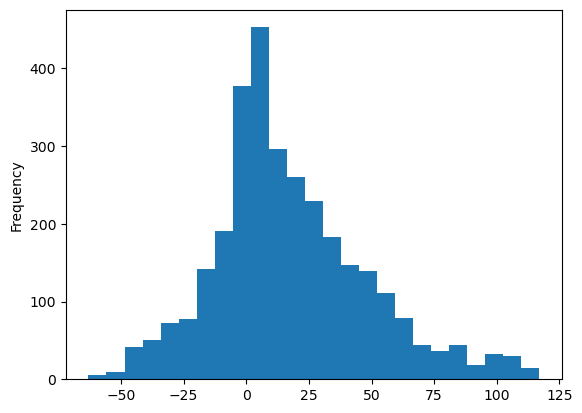

In [1611]:
df['rozdil'].plot.hist(bins=25)

In [1612]:
podil = 0
odpocitadlo = 0
while podil < 0.5:
    odpocitadlo = odpocitadlo + 1
    podil = len( df[(df['rozdil'] > 0) & (df['rozdil'] <= odpocitadlo)]) / len(df['rozdil'])
    print(podil)
print(odpocitadlo)

0.027344992050874404
0.05087440381558029
0.07503974562798092
0.09697933227344992
0.11446740858505565
0.13290937996820348
0.15262321144674085
0.1713831478537361
0.1837837837837838
0.19777424483306835
0.21240063593004768
0.224483306836248
0.2340222575516693
0.24833068362480126
0.25564387917329096
0.2655007949125596
0.28044515103338635
0.2918918918918919
0.3017488076311606
0.3151033386327504
0.3249602543720191
0.3370429252782194
0.3481717011128776
0.3589825119236884
0.37074721780604136
0.38060413354531003
0.3891891891891892
0.39809220985691574
0.4079491255961844
0.42098569157392685
0.43402225755166934
0.44292527821939587
0.4537360890302067
0.4613672496025437
0.46931637519872815
0.4740858505564388
0.4791732909379968
0.487758346581876
0.4944356120826709
0.5014308426073132
40


In [1613]:
df['rozdil'].size

3145

<Axes: ylabel='Frequency'>

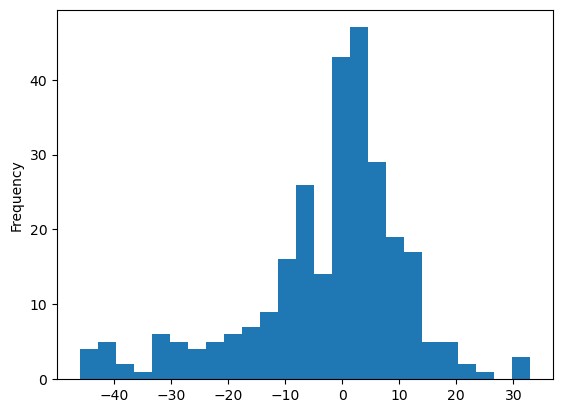

In [1614]:
df[df['nobelovka'] >= 1990]['rozdil'].plot.hist(bins=25)

In [1615]:
df[df['rozdil'] < 0].groupby('100_a')['titul'].nunique().nlargest()

100_a
Jaroslav Seifert      109
Henryk Sienkiewicz     41
Anatole France         25
André Gide             25
John Galsworthy        21
Name: titul, dtype: int64

In [1616]:
df.groupby('100_a')['rozdil'].min().nlargest(200)

100_a
 Jiorgos Seferis                         48.0
 Theodor Mommsen                         35.0
 Nelly Sachs                             34.0
 Shmuel Yosef Agnon                      33.0
 Gabriela Mistral                        25.0
 Odysseus Elytis                         24.0
 Derek Walcott                           18.0
 Jacinto Benavente                       17.0
 Yasunari Kawabata                       16.0
 Pär Lagerkvist                          13.0
 Xingjian Gao                            10.0
 Iosif Aleksandrovič Brodskij            10.0
 Czesław Miłosz                          10.0
 Isaac Bashevis Singer                    9.0
 Frédéric Mistral                         8.0
 Erik Axel Karlfeldt                      8.0
 Rudolf Eucken                            6.0
Saint-John Perse                          5.0
 Juan Ramón Jiménez                       5.0
 Eugenio Montale                          4.0
 José Saramago                            4.0
 Paul Heyse                 

In [1617]:
poradi = df[['100_a','nobelovka']].sort_values(by='nobelovka')
poradi = poradi['100_a'].drop_duplicates().to_list()

In [1618]:
df.groupby('100_a')['rozdil'].min().reindex(poradi)

100_a
 Erik Axel Karlfeldt                      8.0
 Theodor Mommsen                         35.0
 Bjørnstjerne Bjørnson                  -30.0
 Frédéric Mistral                         8.0
 José Echegaray                         -12.0
 Henryk Sienkiewicz                     -24.0
 Giosue Carducci                        -16.0
 Rudyard Kipling                        -14.0
 Rudolf Eucken                            6.0
 Selma Lagerlöf                          -8.0
 Paul Heyse                               3.0
 Maurice Maeterlinck                    -11.0
 Gerhart Hauptmann                      -17.0
 Rabíndranáth Thákur                      1.0
 Romain Rolland                           1.0
 Verner von Heidenstam                    0.0
 Henrik Pontoppidan                     -22.0
 Karl Adolf Gjellerup                     2.0
 Carl Spitteler                           2.0
 Knut Hamsun                            -23.0
 Anatole France                         -26.0
 Jacinto Benavente          

<Axes: xlabel='100_a'>

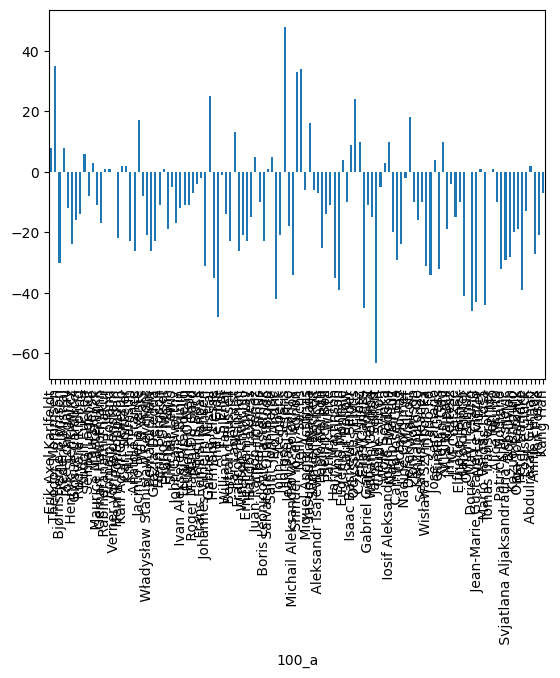

In [1619]:
df.groupby('100_a')['rozdil'].min().reindex(poradi).plot.bar()

In [1620]:
len(df[df['rozdil'].isin([1,2,3])]) / len(df[df['rozdil'].isin([-1,-2,-3])])

1.8153846153846154

In [1621]:
df.groupby('100_7')['rozdil'].min().nlargest(200)

100_7
jn20000402202        48.0
skuk0000903          35.0
jn20000810312        34.0
jn20000600054        33.0
jn19981001854        25.0
ola2002161265        24.0
kup19950000109491    18.0
jn19990000655        17.0
jn20000603323        16.0
jn19990004816        13.0
jn19990001110        10.0
jo20000075484        10.0
jn19990005739        10.0
jn19990007991         9.0
jo20000080728         8.0
xx0047446             8.0
skuk0000369           6.0
jn19990007305         5.0
jn19981001567         5.0
xx0001988             4.0
jn20000604067         4.0
jn20000700710         3.0
jn20000605097         3.0
jn20010602599         2.0
xx0011793             2.0
jn20010420012         2.0
jn19990008691         1.0
jn19990005954         1.0
jn20000604537         1.0
kv2013742559          1.0
jn19990007118         1.0
jn19981002206         1.0
jn19990003311         0.0
jo2006321171          0.0
jn19990002039        -1.0
jn19990002779        -2.0
xx0003184            -2.0
jn19990001184        -4.0
jn2000

## Graf

In [1623]:
vsechny_roky = koho['nobelovka'].to_list()

In [1624]:
chybejici_roky = [x for x in vsechny_roky if x not in df['nobelovka'].to_list()]
chybejici_roky

[1977]

In [1625]:
rucni_doplneni = pd.DataFrame([{'100_a': 'Tomas Tranströmer', 'nobelovka': 2011, 'rozdil': 3, 'titul': 'Přijde smrt a vezme ti míry', 'rok': 2014}, {'100_a': 'Vicente Aleixandre', 'nobelovka': 1977, 'rozdil': None, 'rok': None, 'titul': None}])

In [1626]:
dografu = df[(df['rozdil'] <= df.groupby('100_7')['rozdil'].min().max())][['100_a','rozdil','nobelovka','titul','rok']] # .rename(columns={'100_a':'jméno','rozdil':'vydání před/po nobelovce'})

In [1627]:
rucni_doplneni

,100_a,nobelovka,rozdil,titul,rok
0,Tomas Tranströmer,2011,3.0,Přijde smrt a vezme ti míry,2014.0
1,Vicente Aleixandre,1977,NaN,None,NaN


In [1628]:
dografu = pd.concat([rucni_doplneni, dografu], ignore_index=True, axis=0).sort_values('nobelovka',ascending=False)

In [1629]:
# dografu = dografu.sample(5)

In [1630]:
dografu['100_a'] = dografu.apply(lambda row: f"{row['100_a'].split( )[-1].strip()} ({row['nobelovka']})", axis=1)

In [1631]:
with open(os.path.join("src","scatter_template.html"), "r", encoding="utf-8") as template:
    template = template.read()

In [1632]:
kategorie = [f'"{x.strip()}"' for x in dografu['100_a'].drop_duplicates().to_list()][::-1]

In [1633]:
serie = []
pocitadlo = 0
for x in dografu.sort_values("nobelovka")['100_a'].drop_duplicates().to_list():
    slovnik = {}
    slovnik['name'] = x
    slovnik['data'] = []
    for index, radek in dografu[dografu['100_a'] == x].iterrows():
        if radek['rozdil'] <= 0:
            barva = "#e63946"
        else:
            barva = "#3E80B6"
        slovnicek = {}
        slovnik['data'].append({'x': radek['rozdil'], 'y': pocitadlo, 'titul': radek['titul'], 'rok': radek['rok'], 'color': barva})
    serie.append(slovnik)
    pocitadlo = pocitadlo + 1

In [1690]:
export_grafu = template.replace("TITULEK","Jak brzy či pozdě vycházeli nobelisté česky").replace("OSA_X","roky před obdržením Nobelovy ceny a po něm").replace("KATEGORIE",f"[{','.join(kategorie)}]").replace('SERIE',str(serie).replace(' nan,',' null,').replace(' None,',' null,'))
with open(os.path.join("grafy","scatter_nobelovky_export.html"), "w+", encoding="utf-8") as vystupni_graf:
    vystupni_graf.write(export_grafu)
with open(os.path.join("grafy","scatter_nobelovky_export.txt"), "w+", encoding="utf-8") as vystupni_graf:
    vystupni_graf.write(export_grafu.replace('<html><body>','').replace('</body></html>',''))

## Kdo to překládá

In [1636]:
prekladatelstvo = df.dropna(subset=['700_4','700_7','700_a']).explode(['700_4','700_7','700_a'])

In [1637]:
prekladatelstvo[prekladatelstvo['700_4'] == 'trl'].groupby('700_a')['100_a'].nunique().nlargest(10)

700_a
Kondrysová, Eva,                6
Krausová-Lesná, Milada,         6
Valja, Jiří,                    6
Hackenschmied, Hanuš,           5
Vrba, František,                5
Eisner, Pavel,                  4
Hron, Zdeněk,                   4
Kosterka, Hugo,                 4
Köllnová-Ehrmannová, Božena,    4
Nenadál, Radoslav,              4
Name: 100_a, dtype: int64